As always, we start by loading our modules and doing a bit of set up:



In [1]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



## Datasets

We are going to read into Python five different datasets that are all interrelated with one
another. Let's read them all into the notebook below. I will put them in their own cells so
that they all print out the first few rows of each.



In [2]:
flights = pd.read_csv(ubase + "data/flightsrva_flights.csv.gz")
flights.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2019,1,1,548.0,550,-2.0,728.0,740,-12.0,WN,25,N485WN,RIC,ATL,85.0,481,5,50,2019-01-01T05:00:00Z
1,2019,1,1,552.0,600,-8.0,814.0,824,-10.0,B6,33,N624JB,RIC,FLL,115.0,805,6,0,2019-01-01T06:00:00Z
2,2019,1,1,558.0,600,-2.0,817.0,810,7.0,YX,135,N818MD,RIC,MSP,161.0,970,6,0,2019-01-01T06:00:00Z
3,2019,1,1,630.0,630,0.0,713.0,729,-16.0,YV,145,N88327,RIC,IAD,26.0,100,6,30,2019-01-01T06:00:00Z
4,2019,1,1,639.0,645,-6.0,748.0,824,-36.0,AA,58,N680AW,RIC,CLT,52.0,257,6,45,2019-01-01T06:00:00Z
5,2019,1,1,641.0,645,-4.0,827.0,847,-20.0,DL,28,N960DN,RIC,ATL,85.0,481,6,45,2019-01-01T06:00:00Z
6,2019,1,1,648.0,654,-6.0,910.0,924,-14.0,YX,117,N443YX,RIC,MIA,119.0,825,6,54,2019-01-01T06:00:00Z
7,2019,1,1,655.0,700,-5.0,933.0,945,-12.0,AA,62,N930AU,RIC,DFW,194.0,1158,7,0,2019-01-01T07:00:00Z
8,2019,1,1,717.0,725,-8.0,828.0,855,-27.0,9E,79,N8943A,RIC,JFK,54.0,288,7,25,2019-01-01T07:00:00Z
9,2019,1,1,734.0,730,4.0,903.0,850,13.0,UA,29,N29717,RIC,ORD,121.0,642,7,30,2019-01-01T07:00:00Z


In [3]:
airlines = pd.read_csv(ubase + "data/flightsrva_airlines.csv.gz")
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines LLC d/b/a aha!
5,G4,Allegiant Air
6,MQ,Envoy Air
7,NK,Spirit Air Lines
8,OH,PSA Airlines Inc.
9,OO,SkyWest Airlines Inc.


In [4]:
airports = pd.read_csv(ubase + "data/flightsrva_airports.csv.gz")
airports.head(10)

,faa,name,lat,lon,alt,tz,dst,tzone
0,AAF,Apalachicola Regional Airport,29.727501,-85.027496,20,-5.0,A,America/New_York
1,AAP,Andrau Airpark,29.722500,-95.588303,79,-6.0,A,America/Chicago
2,ABE,Lehigh Valley International Airport,40.652100,-75.440804,393,-5.0,A,America/New_York
3,ABI,Abilene Regional Airport,32.411301,-99.681900,1791,-6.0,A,America/Chicago
4,ABL,Ambler Airport,67.106300,-157.856989,334,-9.0,A,America/Anchorage
5,ABQ,Albuquerque International Sunport,35.040199,-106.609001,5355,-7.0,A,America/Denver
6,ABR,Aberdeen Regional Airport,45.449100,-98.421799,1302,-6.0,A,America/Chicago
7,ABY,Southwest Georgia Regional Airport,31.535500,-84.194504,197,-5.0,A,America/New_York
8,ACK,Nantucket Memorial Airport,41.253101,-70.060204,47,-5.0,A,America/New_York
9,ACT,Waco Regional Airport,31.611300,-97.230499,516,-6.0,A,America/Chicago


In [5]:
planes = pd.read_csv(ubase + "data/flightsrva_planes.csv.gz")
planes.head(10)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
1,N102HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
3,N103HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
4,N103SY,2014.0,Fixed wing multi engine,EMBRAER S A,ERJ 170-200 LR,2,88,0,Turbo-fan
5,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
6,N104HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
7,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
8,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,0,Turbo-fan
9,N105HQ,2007.0,Fixed wing multi engine,EMBRAER,ERJ 170-200 LR,2,88,0,Turbo-fan


In [6]:
weather = pd.read_csv(ubase + "data/flightsrva_weather.csv.gz")
weather.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,RIC,2019,1,1,0,NaN,NaN,NaN,180.0,8.05546,9.270062,NaN,NaN,1.0,2019-01-01T05:00:00Z
1,RIC,2019,1,1,1,NaN,NaN,NaN,180.0,12.65858,14.567241,NaN,NaN,1.5,2019-01-01T06:00:00Z
2,RIC,2019,1,1,2,NaN,NaN,NaN,180.0,13.80936,15.891535,NaN,NaN,1.5,2019-01-01T07:00:00Z
3,RIC,2019,1,1,3,NaN,NaN,NaN,180.0,13.80936,15.891535,NaN,NaN,4.0,2019-01-01T08:00:00Z
4,RIC,2019,1,1,4,NaN,NaN,NaN,190.0,12.65858,14.567241,NaN,NaN,9.0,2019-01-01T09:00:00Z
5,RIC,2019,1,1,5,NaN,NaN,NaN,200.0,19.56326,22.513008,NaN,NaN,10.0,2019-01-01T10:00:00Z
6,RIC,2019,1,1,6,NaN,NaN,NaN,200.0,17.26170,19.864419,NaN,NaN,10.0,2019-01-01T11:00:00Z
7,RIC,2019,1,1,7,NaN,NaN,NaN,210.0,18.41248,21.188714,NaN,NaN,10.0,2019-01-01T12:00:00Z
8,RIC,2019,1,1,8,NaN,NaN,NaN,220.0,16.11092,18.540125,NaN,NaN,10.0,2019-01-01T13:00:00Z
9,RIC,2019,1,1,9,NaN,NaN,NaN,210.0,16.11092,18.540125,NaN,NaN,10.0,2019-01-01T14:00:00Z




## Questions

Create a dataset that gives the number of flights each day.



In [14]:
day_flights = (
    flights
    .groupby(["month","day"])
    .agg(
        num_flights_per_day = ("day", "count")
    )
    .reset_index()
)
day_flights

,month,day,num_flights_per_day
0,1,1,47
1,1,2,56
2,1,3,59
3,1,4,57
4,1,5,49
...,...,...,...
360,12,27,62
361,12,28,58
362,12,29,62
363,12,30,62




Compute the average, minimum, and maximum number of flights per day.



In [23]:
(day_flights
.agg(
    avg_flights = ("num_flights_per_day","mean"),
    min_flights = ("num_flights_per_day","min"),
    max_flights = ("num_flights_per_day","max")
)
)

,num_flights_per_day
avg_flights,67.967123
min_flights,38.000000
max_flights,79.000000




Compute the number of flights over the course of the year by each airline. Use the
proper airline names by joining to the `airlines` dataset. Note: This can be done
before or after the aggregation.



In [30]:
(
    airlines.merge(flights, on="carrier")
    .groupby("name")
    .agg(
        flights_per_year = ("year","count")
    )
)

,flights_per_year
name,
Allegiant Air,396
American Airlines Inc.,2647
Delta Air Lines Inc.,3220
Endeavor Air Inc.,1775
Envoy Air,2463
ExpressJet Airlines LLC d/b/a aha!,1668
JetBlue Airways,2531
Mesa Airlines Inc.,872
PSA Airlines Inc.,1196




Compute the average departure delay (`dep_delay`) for each value of the the
visibility score (`visib` on the `weather` table). Does there seem to be a
relationship between visibility and delay?



In [31]:
(
    weather.merge(flights, on="time_hour")
    .groupby("visib")
    .agg(
        avg_dep_delay = ("dep_delay","mean")
    )
)

,avg_dep_delay
visib,
0.06,-4.166667
0.13,8.000000
0.24,-5.857143
0.25,14.073171
0.50,9.096774
0.75,8.076923
1.00,25.644068
1.25,52.545455
1.50,21.875000




By creating a new variable called `delayed` when a flight is delayed for more
than 15 minutes (hint: use `.eval`), compute the percentage of flights delayed
more than 15 minutes by the hour of the day. What tends to be the best approach
for not having your flight delayed?





Now, create a dataset that counts the number of flights by their destination. Join it
to the `airports` data so that we have all the metadata. Sort by the count.
Save this as a dataset for the next (final) question.



In [52]:
flights_to = (
    flights
    .groupby("dest")
    .agg(
        flights_to_num = ("dest","count")
    )
    .reset_index()
    .sort_values("flights_to_num")

)
flights_to = flights_to.merge(airports, left_on="dest", right_on = "faa")
flights_to

,dest,flights_to_num,faa,name,lat,lon,alt,tz,dst,tzone
0,TPA,41,TPA,Tampa International Airport,27.975500,-82.533203,26,-5.0,A,America/New_York
1,SRQ,71,SRQ,Sarasota Bradenton International Airport,27.395399,-82.554398,30,-5.0,A,America/New_York
2,BNA,105,BNA,Nashville International Airport,36.124500,-86.678200,599,-6.0,A,America/Chicago
3,PHL,108,PHL,Philadelphia International Airport,39.871899,-75.241096,36,-5.0,A,America/New_York
4,PIE,108,PIE,St Petersburg Clearwater International Airport,27.910200,-82.687401,11,-5.0,A,America/New_York
5,SFB,112,SFB,Orlando Sanford International Airport,28.777599,-81.237503,55,-5.0,A,America/New_York
6,IAD,557,IAD,Washington Dulles International Airport,38.944500,-77.455803,312,-5.0,A,America/New_York
7,IAH,598,IAH,George Bush Intercontinental Houston Airport,29.984400,-95.341400,97,-6.0,A,America/Chicago
8,MSP,687,MSP,Minneapolis-St Paul International/Wold-Chamber...,44.882000,-93.221802,841,-6.0,A,America/Chicago
9,MIA,700,MIA,Miami International Airport,25.793200,-80.290604,8,-5.0,A,America/New_York




Finally, use the dataset you created in the previous section to create a map that shows the
cities that flights fly to from Richmond with the sizes scaled by the number of flights.



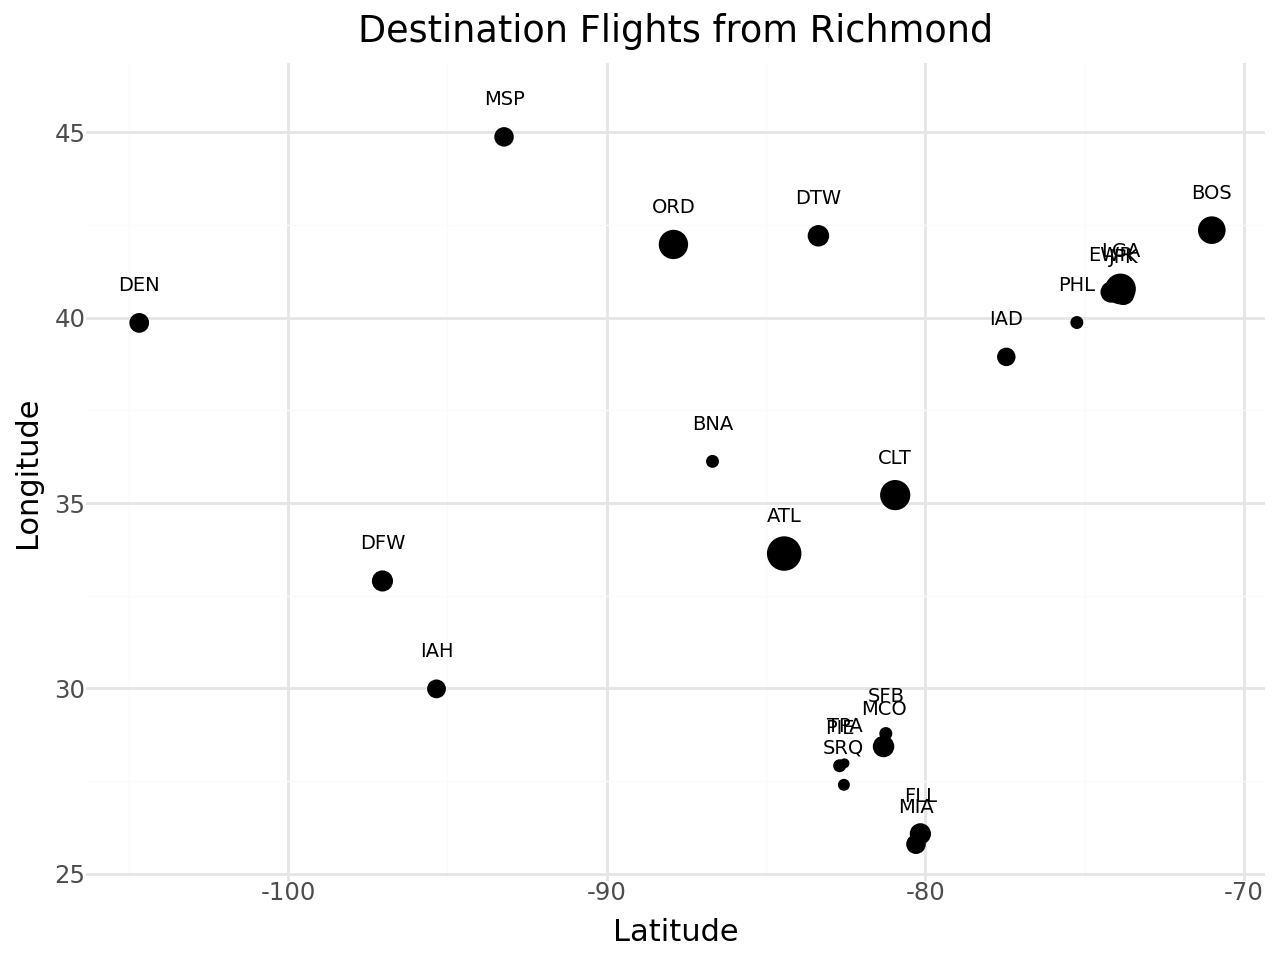

In [64]:
(
    ggplot(flights_to)
    +geom_point(aes(x = "lon", y="lat", size = "flights_to_num"),show_legend = False)
    +geom_text(aes(x="lon", y="lat", label = "dest"), nudge_y = 1, size = 7)
    +labs(
        title = "Destination Flights from Richmond",
        x = "Latitude",
        y = "Longitude"
    )
)



**Extra**: If you have time, try to add a few items to the plot
above to make it more useful: (1) color the points, (2) add labels to
the cities, and (3) add a point for Richmond.

